In [1]:
import os
import sys
import matplotlib.pyplot as plt

sys.path.append("../../")
from didgelab.analysis import *

#saved_evolutions/evolution_operations.jsonl.gz
indir = "../../../saved_evolutions/2024-04-20T11-50-54_evolve_tamaki3/"

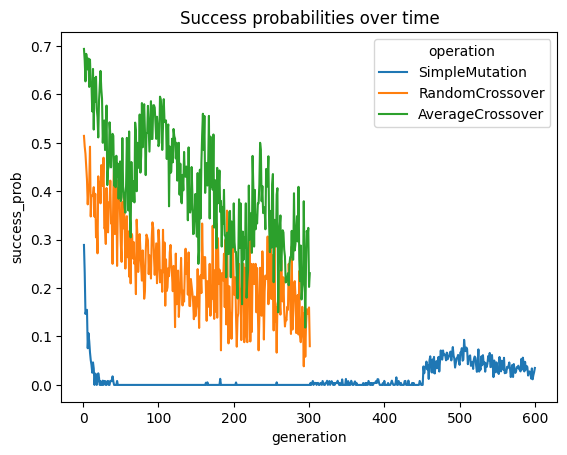

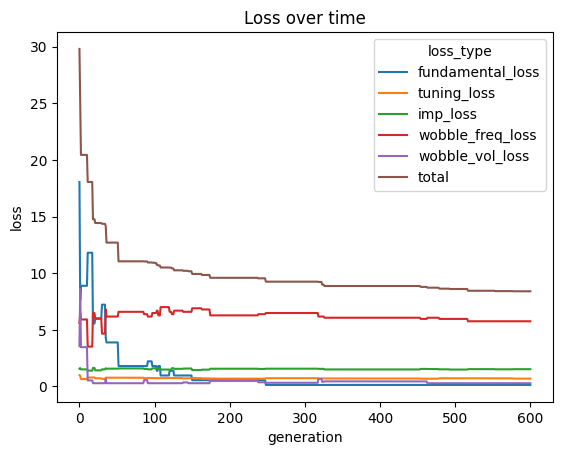

In [2]:
infile = os.path.join(indir, "evolution_operations.jsonl.gz")
nodes = build_graph(infile)
deltas = get_deltas(nodes)
plot_success_probs_over_time(deltas)
plt.show()
plot_loss_over_time(nodes)

************************
Individual 0
************************


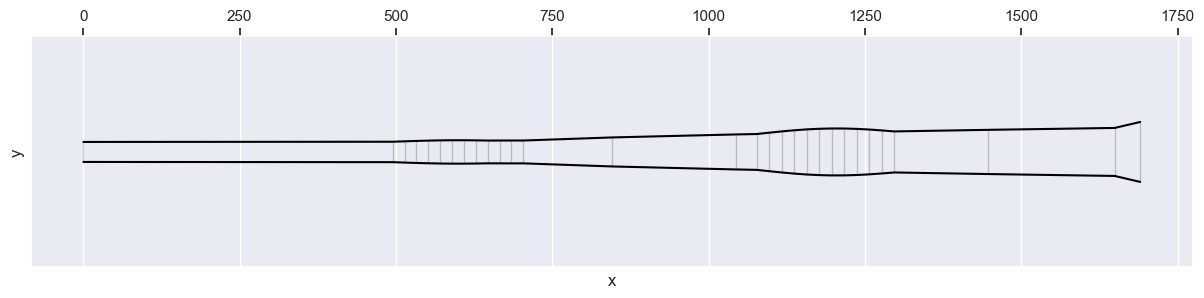

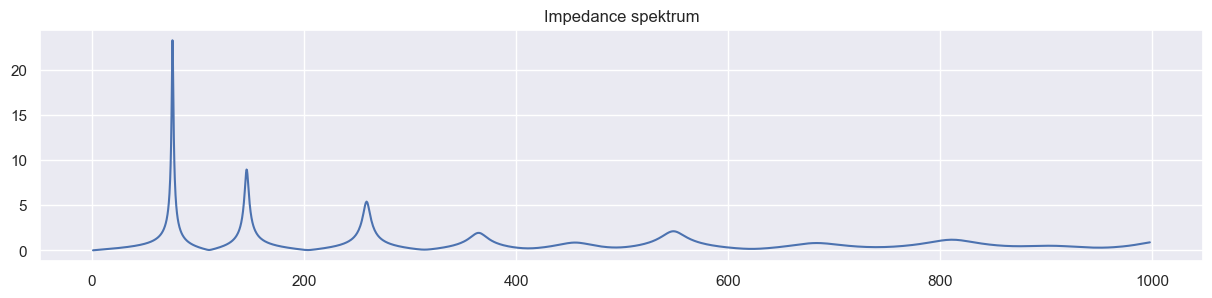

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1      -4.47      -31   75.89      23.27     1.00
1       C#2      25.53      -20  145.76       8.96     0.38
2        B3      20.53      -10  258.97       5.41     0.23
3        F3      10.53       -4  364.14       1.94     0.08
4        A4       0.53        0  456.14       0.87     0.04
5        C4      20.53        3  548.75       2.12     0.09
6        E4       0.53        7  683.44       0.82     0.04
7        G4      -4.47       10  810.41       1.18     0.05
8        A5     -19.47       12  901.80       0.52     0.02
Impedance sum: 45.08
Volume: 88.89 cm3
Length: 169.03 cm
Bell diameter: 9.59 cm

************************
Individual 1
************************


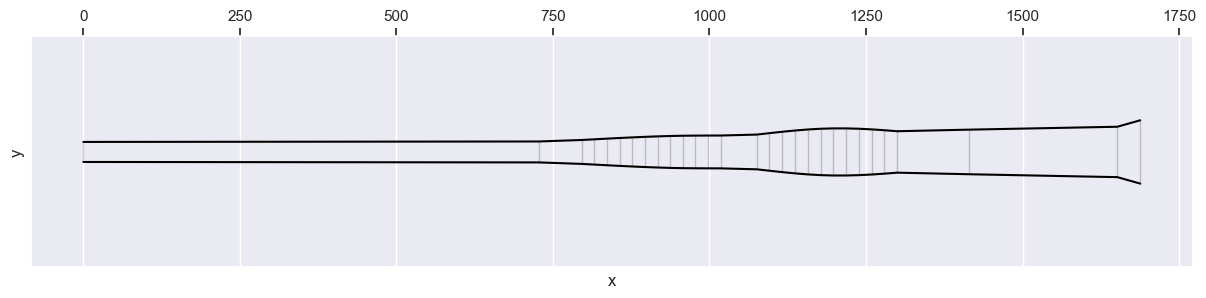

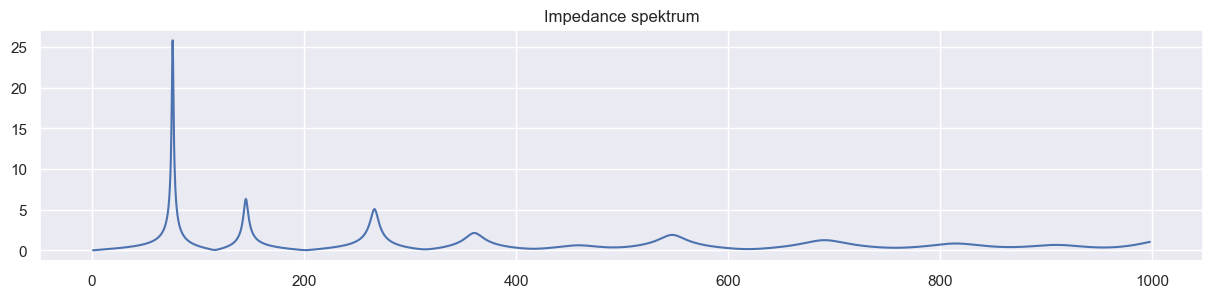

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      25.85     1.00
1       C#2      20.53      -20  145.34       6.31     0.24
2        C3     -29.47       -9  266.56       5.08     0.20
3        F3      -4.47       -4  360.99       2.14     0.08
4        A4      10.53        0  458.78       0.63     0.02
5        C4      15.53        3  547.17       1.91     0.07
6        E4      20.53        7  691.38       1.26     0.05
7        G4       5.53       10  815.10       0.85     0.03
8        A5      -4.47       12  909.65       0.68     0.03
Impedance sum: 44.71
Volume: 87.50 cm3
Length: 168.80 cm
Bell diameter: 10.11 cm

************************
Individual 2
************************


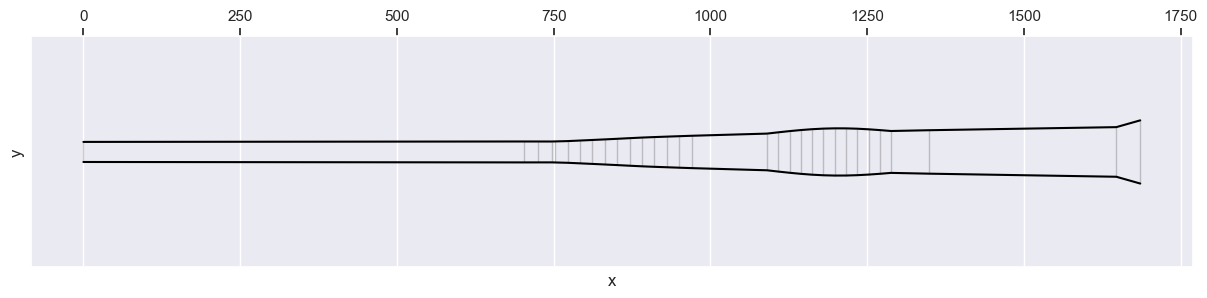

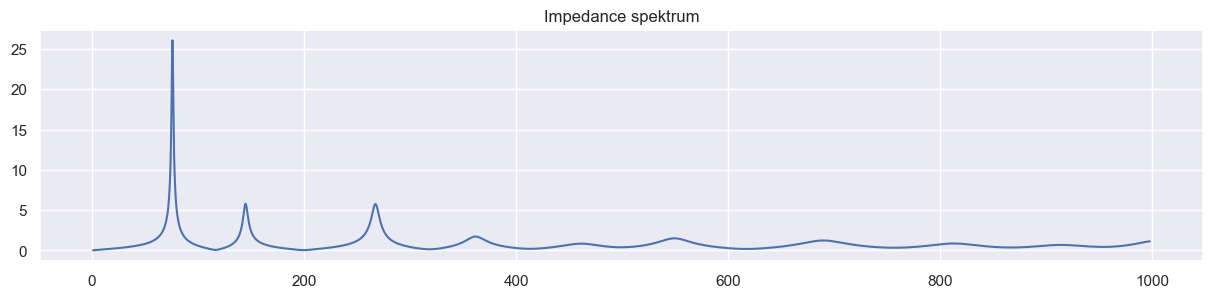

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1      -4.47      -31   75.89      26.09     1.00
1       C#2      15.53      -20  144.93       5.80     0.22
2        C3     -24.47       -9  267.33       5.77     0.22
3        F3       0.53       -4  362.04       1.72     0.07
4        A4      20.53        0  461.44       0.84     0.03
5        C4      20.53        3  548.75       1.50     0.06
6        E4      15.53        7  689.39       1.23     0.05
7        G4       0.53       10  812.75       0.86     0.03
8        A5       5.53       12  914.92       0.68     0.03
Impedance sum: 44.49
Volume: 87.28 cm3
Length: 168.53 cm
Bell diameter: 10.07 cm



In [8]:
infile = "../../../saved_evolutions/test/arusha_pop.json"
population = json.load(open(infile))["population"]
visualize_individuals(population, n=3, base_freq=456)

In [6]:
infile

'../../../saved_evolutions/test/arusha_pop.json'

In [4]:
population

[{'genome': [0.020085790477701555,
   0.9400957486705783,
   0.1816453358788233,
   0.4543702576154167,
   0.41569268715088914,
   0.15281569316392155,
   0.0,
   0.37664344225212776,
   0.0,
   0.49680429778806556,
   0.006587327239088768,
   0.7029068434473782,
   0.0,
   0.7520184217120583,
   0.16671357267044262,
   0.44044379657225446,
   0.3620439998078543,
   0.21205918863964954,
   0.5232134329233622,
   0.8082726553991859,
   0.6646985989636034,
   0.30941475150172537,
   0.7873997253320169,
   0.5,
   1.0,
   0.385976738694614,
   0.9944934517491182,
   0.41263085693569745,
   0.8180381663558594,
   0.8660295817953396,
   1.0],
  'loss': {'fundamental_loss': 0.971279287740412,
   'tuning_loss': 0.7243776469267449,
   'imp_loss': 1.471116235114955,
   'wobble_freq_loss': 6.5893319348886426,
   'wobble_vol_loss': 0.2889760295752919,
   'total': 10.045081134246047},
  'representation': {'geo': [[0.0, 32.0],
    [87.55308527577128, 26.03218942211697],
    [197.94665278851394, 26.